In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the datasets
flocks_df = pd.read_csv('./data/hpai-flocks.csv')
mammals_df = pd.read_csv('./data/hpai-mammals.csv')
weather_df = pd.read_csv('./data/weather.csv')
livestock_df = pd.read_csv('./data/hpai-livestock.csv')
wild_birds_df = pd.read_csv('./data/hpai-wild-birds1.csv')

In [19]:
# Data preprocessing
flocks_df['Outbreak Date'] = pd.to_datetime(flocks_df['Outbreak Date'])
weather_df['County'] = weather_df['County'].str.strip()

# Merge datasets
merged_df = pd.merge(flocks_df, weather_df, on=['County', 'State'], how='inner')

# Clean the Birds Affected column
merged_df['Birds Affected'] = merged_df['Birds Affected'].str.replace(',', '').astype(float)

In [20]:
# Create features for prediction
features = ['Temp', 'Temp Anomaly (1901-2000 base period)', 
           'Precipitation', 'Prec Anomaly (1901-2000 base period)',
           'Z Palmer Index']

# Create binary target
merged_df['outbreak_severity'] = (merged_df['Birds Affected'] > merged_df['Birds Affected'].median()).astype(int)

In [21]:
# Prepare X and y
X = merged_df[features]
y = merged_df['outbreak_severity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

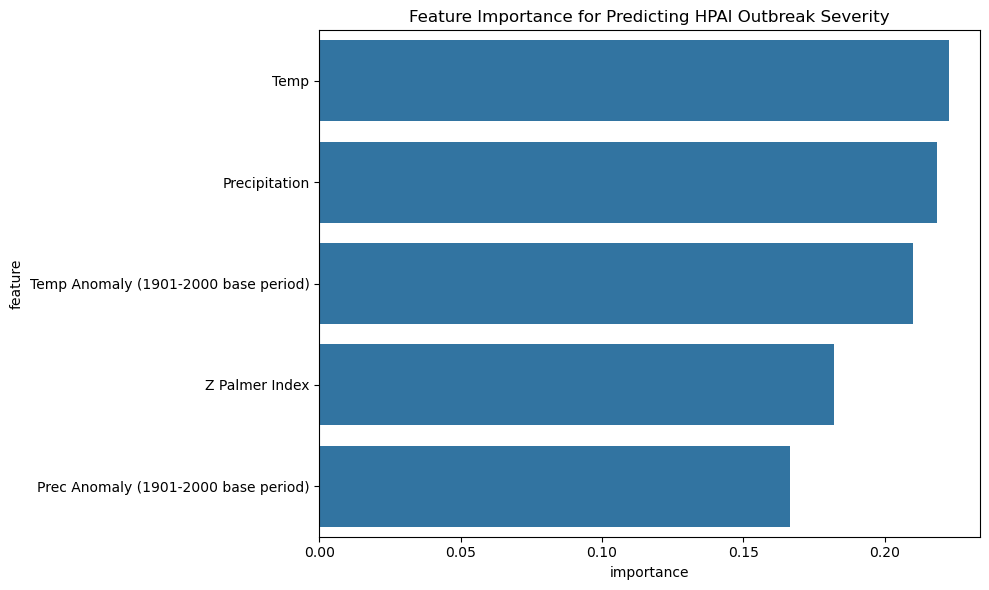

In [22]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting HPAI Outbreak Severity')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [23]:
# Print model performance
y_pred = rf_model.predict(X_test_scaled)
print("Model Performance Report:")
print(classification_report(y_test, y_pred))

Model Performance Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       154
           1       0.77      0.85      0.81       146

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

